In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def get_folder_path(batch_number, is_pretrained=False, is_rep_effect=False):
    model = "finetunedModel_MLPHead_acrossBatches_B56789_80pct_frozen" if not is_pretrained else "pretrained_model"
    filename = "distances_stats_euclidean_rep.csv" if is_rep_effect else "distances_stats_euclidean.csv"
    distances_folder = "distances_1311" if is_pretrained else "distances"
    path = f"/home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/{model}/figures/neuronsDay8_new/{distances_folder}/batch{batch_number}_all_reps_WT_FUSRevertant_FUSHeterozygous_FUSHomozygous_Untreated_FUS/{filename}"

    return path

def load_distances(batch_number, is_pretrained=False, is_rep_effect=False):
    path = get_folder_path(batch_number, is_pretrained, is_rep_effect)
    print(f"Loading distances from: {path}")
    
    df = pd.read_csv(path)

    if not is_rep_effect:
        df = df[df['label1'].str.contains('WT') | df['label2'].str.contains('WT')]

    return df

def get_combined_distances(batch_numbers, is_pretrained=False, is_rep_effect=False):
    combined_df = pd.DataFrame()

    for batch_number in batch_numbers:
        df = load_distances(batch_number, is_pretrained, is_rep_effect)
        print(df)
        if is_rep_effect:
            df['batch'] = (
                df['label1'].str.split('_').str[-2:].str.join('_') + '_' +
                df['label2'].str.split('_').str[-1]
            )
        else:
            df['batch'] = df['label1'].str.rsplit('_', n=1).str[-1]
        df['label1'] = df['label1'].str.rsplit('_').str[1]
        df['label2'] = df['label2'].str.rsplit('_').str[1]
        df = df.rename(columns={'p50': f"p50_{'pretrained' if is_pretrained else 'NOVA'}"})
        df = df.drop(columns=['block_size', 'total_pairs', 'dist_time_s', 'stats_time_s'])
        combined_df = pd.concat([combined_df, df], ignore_index=True)

    return combined_df


def plot_p50_comparison(df: pd.DataFrame, title=None) -> None:
    # Melt to long format
    df_long = df.melt(
        id_vars=['label1', 'label2', 'batch'],
        value_vars=['p50_pretrained', 'p50_NOVA'],
        var_name='model',
        value_name='p50'
    )

    # Clean model names
    df_long['model'] = df_long['model'].str.replace('p50_', '', regex=False)

    # # Create a combined label for x-axis
    df_long['pair'] = df_long['label1'] + ' vs. ' + df_long['label2']

    # df_long['pair'] = (
    #     df_long['label1'] + '-' + df_long['label2'] + '-' + df_long['batch']
    # )

    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_long, x='pair', y='p50', hue='model', ci=95)


    # Add batch info by coloring the x-axis labels
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Label1 - Label2")
    plt.ylabel("p50 value")
    if title is not None:
        plt.title(title)
    else:
        plt.title("Comparison of p50 across models")

    plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()


    plt.show()

Loading distances from: /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/pretrained_model/figures/neuronsDay8_new/distances_1311/batch1_all_reps_WT_FUSRevertant_FUSHeterozygous_FUSHomozygous_Untreated_FUS/distances_stats_euclidean.csv
                                 label1                   label2  block_size  \
3  FUS_FUSHeterozygous_Untreated_batch1  FUS_WT_Untreated_batch1        4540   
6    FUS_FUSHomozygous_Untreated_batch1  FUS_WT_Untreated_batch1        5782   
8     FUS_FUSRevertant_Untreated_batch1  FUS_WT_Untreated_batch1        3270   
9               FUS_WT_Untreated_batch1  FUS_WT_Untreated_batch1        6586   

   total_pairs  dist_time_s  stats_time_s       p50  
3     29900440     0.001196      0.014725  1.026466  
6     38080252     0.019821      0.014171  1.041595  
8     21536220     0.001090      0.008939  0.520481  
9     21684405     0.048228      0.013756  0.515720  
Loading distances from: /home/projects/hornsteinlab/Collaboration/NOVA/output

/tmp/ipykernel_2081254/2915202861.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df_long, x='pair', y='p50', hue='model', ci=95)


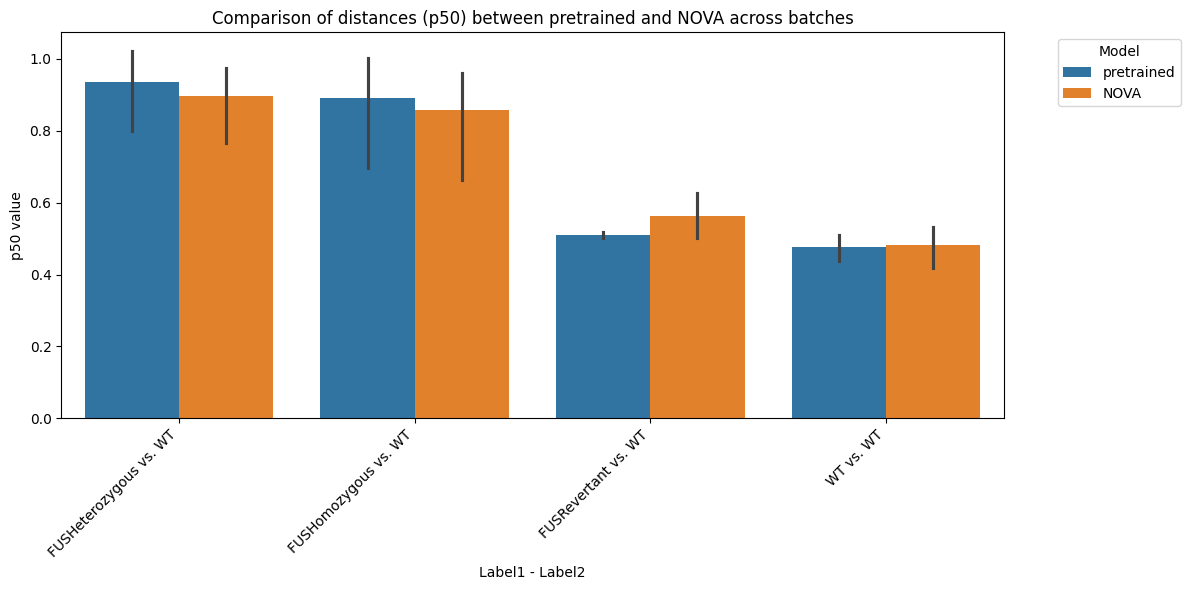

In [8]:
batch_numbers = [1, 2, 3, 7, 8, 9]
df_pretrained = get_combined_distances(batch_numbers, is_pretrained=True)
df_NOVA = get_combined_distances(batch_numbers, is_pretrained=False)

merged = pd.merge(df_pretrained, df_NOVA, on=['label1', 'label2', 'batch'], how='inner')
print(merged)

plot_p50_comparison(merged, title='Comparison of distances (p50) between pretrained and NOVA across batches')

Loading distances from: /home/projects/hornsteinlab/Collaboration/NOVA/outputs/vit_models/pretrained_model/figures/neuronsDay8_new/distances_1311/batch1_all_reps_WT_FUSRevertant_FUSHeterozygous_FUSHomozygous_Untreated_FUS/distances_stats_euclidean_rep.csv
                                       label1  \
0   FUS_FUSHeterozygous_Untreated_batch1_rep1   
1   FUS_FUSHeterozygous_Untreated_batch1_rep1   
2   FUS_FUSHeterozygous_Untreated_batch1_rep2   
3     FUS_FUSHomozygous_Untreated_batch1_rep1   
4     FUS_FUSHomozygous_Untreated_batch1_rep1   
5     FUS_FUSHomozygous_Untreated_batch1_rep2   
6      FUS_FUSRevertant_Untreated_batch1_rep1   
7      FUS_FUSRevertant_Untreated_batch1_rep1   
8      FUS_FUSRevertant_Untreated_batch1_rep2   
9                FUS_WT_Untreated_batch1_rep1   
10               FUS_WT_Untreated_batch1_rep1   
11               FUS_WT_Untreated_batch1_rep2   

                                       label2  block_size  total_pairs  \
0   FUS_FUSHeterozygous_Untreate

/tmp/ipykernel_2081254/2915202861.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df_long, x='pair', y='p50', hue='model', ci=95)


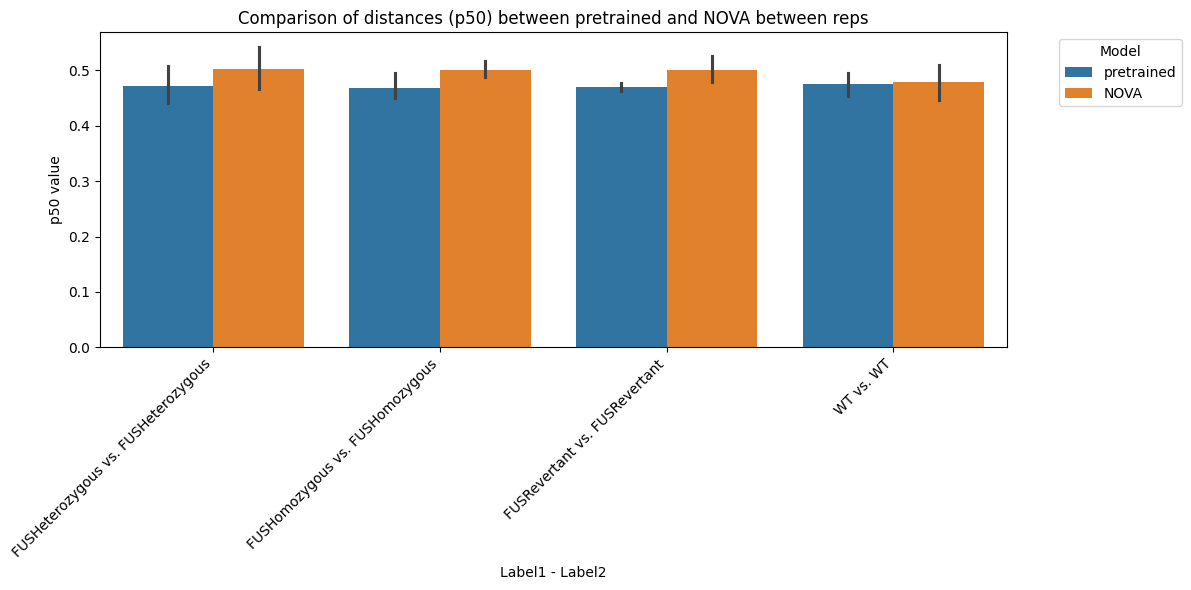

In [9]:
batch_numbers = [1, 2, 3, 7, 8, 9]
df_pretrained = get_combined_distances(batch_numbers, is_pretrained=True, is_rep_effect=True)
df_NOVA = get_combined_distances(batch_numbers, is_pretrained=False, is_rep_effect=True)

merged = pd.merge(df_pretrained, df_NOVA, on=['label1', 'label2', 'batch'], how='inner')
print(merged)

plot_p50_comparison(merged, title='Comparison of distances (p50) between pretrained and NOVA between reps')